In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from scipy.stats import zscore

import matplotlib.pyplot as plt
%matplotlib inline

This notebook runs linear regression and PCA using the same 2d data.

What happens if you change the data?

Can you come up with some data that would make the results as different as possible?

In [2]:
n1 = np.array([5,-4,8,-10,1,0])
n2 = np.array([7,-2,7,-9,0,-3])

A = np.concatenate((n1[np.newaxis,:], n2[np.newaxis,:]))

print('covariance matrix')
covA = A @ A.T / A.shape[1]
print('[[ %2.1f, %2.f ],\n [ %2.1f, %2.1f ]]'%(covA[0,0],covA[0,1],covA[1,0],covA[1,1]))

# find eigenvalues and eigenvectors of covariance matrix
lam, v = np.linalg.eig( covA )

print( 'eigenvalues: %2.1f, %2.1f'%(lam[0],lam[1]))
print( 'eigenvectors: [%2.2f,%2.2f], [%2.2f,%2.2f]'%(v[0,0],v[1,0],v[0,1],v[1,1]))

covariance matrix
[[ 34.3, 32 ],
 [ 31.5, 32.0 ]]
eigenvalues: 64.7, 1.6
eigenvectors: [0.72,0.69], [-0.69,0.72]


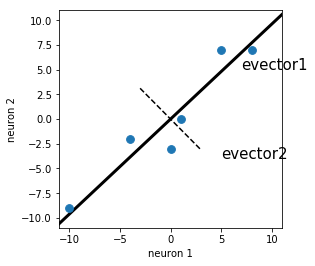

In [3]:
# plot neuron activity with eigenvectors
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(n1,n2,s=60)
ax.plot( np.array([-11,11]), np.array([-11,11])*v[1,0]/v[0,0], color='k', zorder=0, lw=3 )
ax.plot( np.array([-3,3]), np.array([-3,3])*v[1,1]/v[0,1], '--', color='k', zorder=0 )
ax.text( 7,  5, 'evector1',fontsize=15)
ax.text( 5, -4, 'evector2',fontsize=15)
ax.set_xlabel('neuron 1')
ax.set_ylabel('neuron 2')
ax.set_xlim(-11,11)
ax.set_ylim(-11,11)
plt.show()

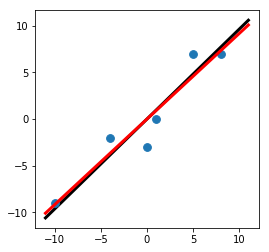

In [10]:
reg = LinearRegression().fit(n1.reshape(-1, 1), n2)
lr_xcoords = np.array([-11,11])
lr_ycoords = reg.coef_[0] * lr_xcoords + reg.intercept_

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
ax.scatter(n1,n2,s=60)
ax.plot( np.array([-11,11]), np.array([-11,11])*v[1,0]/v[0,0], color='k', zorder=0, lw=3 )
ax.plot( lr_xcoords, lr_ycoords, color='r', lw=3 )

# So they're basically the same for these data

In [41]:
# The normal equation breaking example

xnasty = np.array([0,0,0]).reshape(-1,1)
ynasty = np.array([0,1,2]).reshape(-1,1)

# pca matrix should be size (nsamples, nfeatures)
pcaX = np.concatenate( (xnasty, ynasty ), axis=1)

pca = PCA()
pca.fit( pcaX )
V = pca.components_
print( 'pca: :', V[:,0] )

reg = LinearRegression().fit(xnasty, ynasty )
print( 'intercept = %f . slope = %f ' % (reg.intercept_, reg.coef_[0],  ))

pca: : [-0.  1.]
intercept = 1.000000 . slope = 0.000000 


In [61]:
x = n1.reshape(-1,1)
y = n2.reshape(-1,1)

xm = np.mean(x)
ym = np.mean(y)

pcaDatMtx = np.concatenate( (x - xm, y - ym), axis=1)
print( pcaDatMtx.shape )

pca = PCA()
pca.fit( pcaDatMtx )
V = pca.components_
U = np.matmul( pcaDatMtx, V.T ) / sv
print( U )

# pc1 = V[:,0]
# print( pc1.shape )
# # project X onto V1
# proj = pcaDatMtx @ pc1.T
# print( proj )

0.0
0.0
(6, 2)
[[-11.96092632         -inf]
 [  6.03599016         -inf]
 [-15.01593941          inf]
 [ 19.01525418         -inf]
 [ -1.01833769          inf]
 [  2.94395908          inf]]


/Users/bogovicj/miniconda3/envs/mathclub/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


In [44]:
V

array([[-0.72007349, -0.69389781],
       [ 0.69389781, -0.72007349]])